<a href="https://colab.research.google.com/github/david-levin11/alaska_verification/blob/main/PlotHiRes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective: To plot archived high resolution model data for AK**
<br/>
Description--This script will attempt to use the Herbie python package to download and plot archived hi-resolution model data for case reviews/operational recaps.

The available models are:

**AK HRRR**<br/>
**RRFS Control Run**<br/>
**NamNest**

HRRR data for Alaska is available on AWS back to 2018.  NamNest data goes back to September 2021. RRFS data is sporadic as it is an experimental model but most of the data from 2024 is available on AWS.  Sometimes runs will not be found or be incomplete.  This may cause issues especially with precipitation variables which rely on two timesteps to be available in order to plot properly.

I have the notebook set to plot only a few of the numerous variables the hi-res models output.  If there is a particular variable you would like to see plotted, feel free to let me know and I'll see if I can add it.  Alternatively you are welcome to make a copy of this notebook and play around with adding various improvements!

**Update: 9/12/2024**
--Added custom zoom areas as well as the ability to create animated gifs.  Let me know if you'd like different zooms or any other features/fields!

**Update: 4/29/2025**
--RRFS was broken **AGAIN** as the file structures on AWS are constantly changing.  Since Herbie no longer works with RRFS I updated to remove the Herbie dependency for RRFS and tried to make it smart enough to grab whatever files exist for the RRFS evaluation on the AWS S3 bucket.  It's not as many as used to be unfortunately.  Best advice is just to try your date and see if a run exists. If you can find the run on https://noaa-rrfs-pds.s3.amazonaws.com/index.html#retro_output_final/ but the script is still not plotting, please let me know.  Also if there are additional fields you'd like to see plotted for the RRFS evaluation, please contact me.  

**Update: 5/5/2025**
--RRFS repo is now missing on AWS so until it is either fixed or brought back RRFS fields will not work.  Will update as soon as more information becomes available.

- David Levin, Arctic Testbed & Proving Ground, Anchorage Alaska

##**2 - Install and Import Packages**
This will take about a minute to run.

In [1]:
# @title
!pip install eccodes==2.38.3 # need this version to avoid a google colab crash
!pip install herbie-data[extras]
!pip install cartopy
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
from herbie import paint
import requests
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import pandas as pd
try:
    import numpy as np
    import os
    import sys
    import re
    import xarray as xr
    from datetime import datetime, timedelta
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
except ImportError:
    raise ImportError("herbie.paint requires matplotlib.")
from PIL import Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.3/113.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.3/424.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 7.3 MB/s eta 0:00:00
 ╭─▌▌Herbie─────────────────────────────────────────────╮
 │ INFO: Created a default config file.                 │
 │ You may view/edit Herbie's configuration here:       │
 │          /root/.config/herbie/config.toml            │
 ╰──────────────────────────────────────────────────────╯



##**3 - Download & Plot**

<ipython-input-50-bfdfdbe0295b>:19: UserWarning: Overwriting the cmap 'nws.pcp' that was already in the registry.
  mpl.colormaps.register(cmap=cm, force=True)
<ipython-input-50-bfdfdbe0295b>:20: UserWarning: Overwriting the cmap 'nws.pcp_r' that was already in the registry.
  mpl.colormaps.register(cmap=cm.reversed(), force=True)
<ipython-input-50-bfdfdbe0295b>:19: UserWarning: Overwriting the cmap 'nws.pcp2' that was already in the registry.
  mpl.colormaps.register(cmap=cm, force=True)
<ipython-input-50-bfdfdbe0295b>:20: UserWarning: Overwriting the cmap 'nws.pcp2_r' that was already in the registry.
  mpl.colormaps.register(cmap=cm.reversed(), force=True)
<ipython-input-50-bfdfdbe0295b>:19: UserWarning: Overwriting the cmap 'nws.pcp_snow' that was already in the registry.
  mpl.colormaps.register(cmap=cm, force=True)
<ipython-input-50-bfdfdbe0295b>:20: UserWarning: Overwriting the cmap 'nws.pcp_snow_r' that was already in the registry.
  mpl.colormaps.register(cmap=cm.reversed(), f

Selected forecast hour range: 24 to 24
Forecast hours list: [24]
Month is: 1
New URL: https://noaa-rrfs-pds.s3.amazonaws.com/retro_output_final/winter/rrfs.20240122/12/rrfs.t12z.prslev.f024.ak.grib2
Old URL: https://noaa-rrfs-pds.s3.amazonaws.com/retro_output_final/winter/rrfs_a/rrfs_a.20240122/12/mem0001/rrfs.t12z.m01.prslev.f024.ak.grib2
Now working on rrfs Visibility for valid time of 2024-01-23 12Z
Month is: 1
  > Downloading subset for rrfs.t12z.prslev.f024.ak.grib2
🧪 Search strings: [':VIS:surface']


✅ Downloaded [1] fields → model/winter_rrfs.t12z.prslev.f024.ak.grib2


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


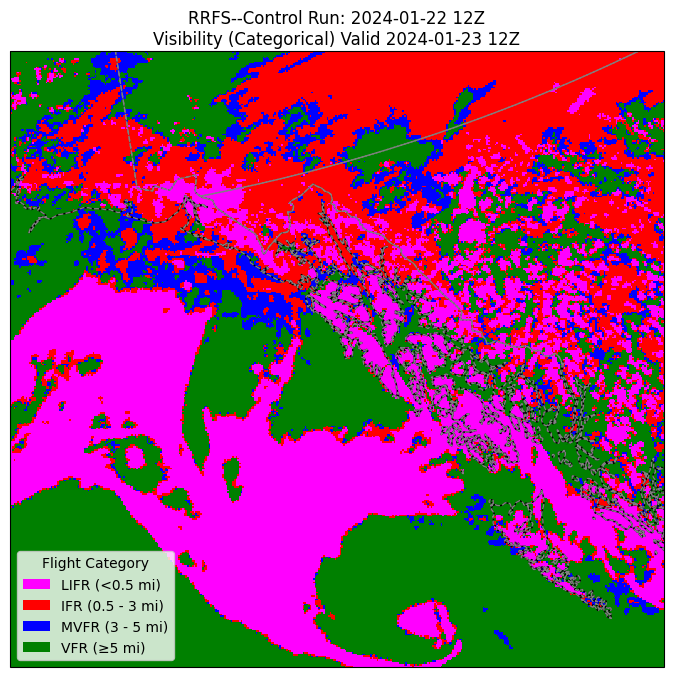

Saved Surface RRFS_Visibility_2024012212Z_2024012312Z.png to /nas/hires/graphics


In [50]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

###################### Classes for Colormaps ##################################
# setting up our colorscales for plotting precip since Herbie only uses mm    #
# can use paint for everything else                                           #
###############################################################################
def make_custom_cmaps(name, colors, bounds: list = None, N: int = None):
    if N is None:
        N = len(colors)
    linear_cmap = mcolors.LinearSegmentedColormap.from_list(name, colors)
    segment_cmap = mcolors.LinearSegmentedColormap.from_list(name + "2", colors, N=N)

    # When data is NaN, set color to transparent
    linear_cmap.set_bad("#ffffff00")
    segment_cmap.set_bad("#ffffff00")

    for cm in [linear_cmap, segment_cmap]:
        mpl.colormaps.register(cmap=cm, force=True)
        mpl.colormaps.register(cmap=cm.reversed(), force=True)

    if bounds is not None:
        return (
            mcolors.Normalize(bounds.min(), bounds.max()),
            mcolors.BoundaryNorm(bounds, linear_cmap.N),
        )

class NWSPrecipitation:
    """National Weather Service precipitation amount colorbar properties.

    Also known as Qualitative Precipitation Forecast/Estimate (QPF/QPE).
    """

    name = "nws.pcp"
    units = "in"
    variable = "Precipitation"
    colors = np.array(
        [
            "#ffffff",
            "#c7e9c0",
            "#a1d99b",
            "#74c476",
            "#31a353",
            "#006d2c",
            "#fffa8a",
            "#ffcc4f",
            "#fe8d3c",
            "#fc4e2a",
            "#d61a1c",
            "#ad0026",
            "#700026",
            "#3b0030",
            "#4c0073",
            "#ffdbff",
        ]
    )
    # NWS bounds in inches
    bounds = np.array(
        [0, 0.01, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 4, 6, 8, 10, 15, 20, 30, 50]
    )
    norm, norm2 = make_custom_cmaps(name, colors, bounds)
    cmap = plt.get_cmap(name)
    cmap2 = plt.get_cmap(name + "2")
    kwargs = dict(cmap=cmap, norm=norm)
    kwargs2 = dict(cmap=cmap, norm=norm2)
    cbar_kwargs = dict(label=f"{variable} ({units})")
    cbar_kwargs2 = cbar_kwargs | dict(spacing="uniform", ticks=bounds)

class NWSPrecipitationSnow:
    name = "nws.pcp_snow"
    units = "in"
    variable = "Snow"
    colors = np.array(
        [
            "#ffffff",
            "#bdd7e7",
            "#6baed6",
            "#3182bd",
            "#08519c",
            "#082694",
            "#ffff96",
            "#ffc400",
            "#ff8700",
            "#db1400",
            "#9e0000",
            "#690000",
            "#360000",
        ]
    )
    # NWS bounds in inches
    bounds = np.array([0, 0.1, 1, 2, 3, 4, 6, 8, 12, 18, 24, 30, 36, 42])
    norm, norm2 = make_custom_cmaps(name, colors, bounds)
    cmap = plt.get_cmap(name)
    cmap2 = plt.get_cmap(name + "2")
    kwargs = dict(cmap=cmap, norm=norm)
    kwargs2 = dict(cmap=cmap, norm=norm2)
    cbar_kwargs = dict(label=f"{variable} ({units})")
    cbar_kwargs2 = cbar_kwargs | dict(spacing="uniform", ticks=bounds)

class NWSWindSpeed:
    name = "nws.wind"
    units = r"mph"
    variable = "Wind Speed"
    colors = np.array(
        [
            "#103f78",
            "#225ea8",
            "#1d91c0",
            "#41b6c4",
            "#7fcdbb",
            "#b4d79e",
            "#dfff9e",
            "#ffffa6",
            "#ffe873",
            "#ffc400",
            "#ffaa00",
            "#ff5900",
            "#ff0000",
            "#a80000",
            "#6e0000",
            "#ffbee8",
            "#ff73df",
        ]
    )
    # MPH
    bounds = np.array(
        [0.0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 100, 120, 140, 160]
    )
    norm, norm2 = make_custom_cmaps(name, colors, bounds)
    cmap = plt.get_cmap(name)
    cmap2 = plt.get_cmap(name + "2")
    kwargs = dict(cmap=cmap, norm=norm)
    kwargs2 = dict(cmap=cmap, norm=norm2)
    cbar_kwargs = dict(label=f"{variable} ({units})")
    cbar_kwargs2 = cbar_kwargs | dict(spacing="proportional", ticks=bounds)

class NWSWindSpeedkts:
    name = "nws.wind"
    units = r"kts"
    variable = "Wind Speed"
    colors = np.array(
        [
            "#103f78",
            "#225ea8",
            "#1d91c0",
            "#41b6c4",
            "#7fcdbb",
            "#b4d79e",
            "#dfff9e",
            "#ffffa6",
            "#ffe873",
            "#ffc400",
            "#ffaa00",
            "#ff5900",
            "#ff0000",
            "#a80000",
            "#6e0000",
            "#ffbee8",
            "#ff73df",
        ]
    )
    # kts
    bounds = np.array(
        [0.0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 100, 120, 140, 160]
    )
    norm, norm2 = make_custom_cmaps(name, colors, bounds)
    cmap = plt.get_cmap(name)
    cmap2 = plt.get_cmap(name + "2")
    kwargs = dict(cmap=cmap, norm=norm)
    kwargs2 = dict(cmap=cmap, norm=norm2)
    cbar_kwargs = dict(label=f"{variable} ({units})")
    cbar_kwargs2 = cbar_kwargs | dict(spacing="proportional", ticks=bounds)

def plot_towns(ax, south, north, west, east, population=5000, resolution='10m', transform=ccrs.PlateCarree(), zorder=3):
    """
    This function will download the 'populated_places' shapefile from
    NaturalEarth, trim the shapefile based on the limits of the provided
    lat & long coords, and then plot the locations and names of the towns
    on a given GeoAxes.

    ax = a pyplot axes object
    south = south lat limit (float)
    north = north lat limit (float)
    west = west long limit (float)
    east = east long limit (float)
    resolution= str. either high res:'10m' or low res: '50m'
    population = minimum population of towns to plot (int)
    transform = a cartopy crs object
    """
    #get town locations
    shp_fn = shpreader.natural_earth(resolution=resolution, category='cultural', name='populated_places')
    shp = shpreader.Reader(shp_fn)
    xy = [pt.coords[0] for pt in shp.geometries()]
    x, y = list(zip(*xy))

    #get town names
    towns = shp.records()
    names_en = []
    max_population = []
    for town in towns:
        #print(town.attributes)
        names = town.attributes['NAME']
        pop = town.attributes['POP_MAX']
        names_en.append(names)
        max_population.append(pop)
    #print(names_en)
    #create data frame and index by the region of the plot
    all_towns = pd.DataFrame({'names_en': names_en, 'x':x, 'y':y, 'population':max_population})
    #print(all_towns.head())
    region_towns = all_towns[(all_towns.y<north) & (all_towns.y>south)
                           & (all_towns.x>west) & (all_towns.x<east)]
    region_towns = region_towns[region_towns.population > population]
    #print(region_towns.head())
    #plot the locations and labels of the towns in the region
    ax.scatter(region_towns.x.values, region_towns.y.values, c ='black', marker= '.', transform=transform, zorder=zorder)
    transform_mpl = ccrs.PlateCarree()._as_mpl_transform(ax) #this is a work-around to transform xy coords in ax.annotate
    for i, txt in enumerate(region_towns.names_en):
         ax.annotate(txt, (region_towns.x.values[i], region_towns.y.values[i]), xycoords=transform_mpl)

def download_subset_rrfs(remote_url1, remote_url2, search_strings, require_all_matches=True):
    """
    Download subset of GRIB2 file based on .idx entries matching search_strings.
    Will prioritize remote_url1 if both are available.

    Args:
        remote_url1 (str): Primary URL.
        remote_url2 (str): Secondary URL.
        search_strings (list): List of search strings (e.g., [':UGRD:10 m above', ':VGRD:10 m above']).
        require_all_matches (bool): Whether all search strings must be matched.

    Returns:
        str: Local filename if successful, else None.
    """
    remote_file1 = os.path.basename(remote_url1)
    remote_file2 = os.path.basename(remote_url2)

    # Try first index file
    idx_url1 = remote_url1 + ".idx"
    idx_url2 = remote_url2 + ".idx"

    r1 = requests.get(idx_url1)
    r2 = requests.get(idx_url2)

    # Decide which URL to use
    if r1.ok:
        remote_url = remote_url1
        idx_lines = r1.text.strip().split('\n')
    elif r2.ok:
        remote_url = remote_url2
        idx_lines = r2.text.strip().split('\n')
    else:
        print(f"❌ Could not access either .idx file: {idx_url1} or {idx_url2}")
        return None

    # Make output filename with a date tag
    url_parts = remote_url.split('/')
    date_tag = url_parts[-4]  # e.g., '20250429' assuming RRFS URL structure
    remote_file = os.path.basename(remote_url)
    local_filename = os.path.join("model", f"{date_tag}_{remote_file}")
    os.makedirs(os.path.dirname(local_filename), exist_ok=True)

    print(f"  > Downloading subset for {remote_file}")
    print(f"🧪 Search strings: {search_strings}")

    #exprs = {search_str: re.compile(re.escape(search_str)) for search_str in search_strings}
    exprs = {search_str: re.compile(search_str) for search_str in search_strings}
    matched_ranges = {}
    matched_vars = set()

    for n, line in enumerate(idx_lines, start=1):
        if "ens std dev" in line:
            continue  # Skip ensemble std dev fields

        for search_str, expr in exprs.items():
            if expr.search(line):
                matched_vars.add(search_str)
                parts = line.split(':')
                rangestart = int(parts[1])

                if n < len(idx_lines):
                    parts_next = idx_lines[n].split(':')
                    rangeend = int(parts_next[1]) - 1
                else:
                    rangeend = ''  # Last line

                matched_ranges[f"{rangestart}-{rangeend}" if rangeend else f"{rangestart}-"] = line

    if require_all_matches and len(matched_vars) != len(search_strings):
        print(f"⚠️ Not all variables matched! Found: {matched_vars}. Skipping {remote_file}.")
        return None

    if not matched_ranges:
        print(f"❌ No byte ranges matched search strings for {remote_file}")
        return None

    # Now download only the selected byte ranges using requests
    with open(local_filename, 'wb') as f_out:
        for byte_range in matched_ranges.keys():
            headers = {'Range': f'bytes={byte_range}'}
            r = requests.get(remote_url, headers=headers)
            if r.status_code in (200, 206):
                f_out.write(r.content)
            else:
                print(f"❌ Failed to download byte range {byte_range} from {remote_file}")
                return None

    if os.path.exists(local_filename) and os.path.getsize(local_filename) > 10000:
        print(f"✅ Downloaded [{len(matched_ranges)}] fields → {local_filename}")
        return local_filename
    else:
        print(f"❌ File too small or failed: {local_filename}")
        return None

def generate_rrfs_url(date, hour, fxx, member, domain="ak", product="prslev"):
  base_url = "https://noaa-rrfs-pds.s3.amazonaws.com/retro_output_final/"
  date_string = datetime.strptime(date, "%Y-%m-%d").strftime("%Y%m%d")
  month = int(datetime.strptime(date, "%Y-%m-%d").month)
  print(f"Month is: {month}")
  if month in [1, 2, 3] or month == 12:
    folder = "winter"
  elif month in [4, 5, 6]:
    folder = "spring"
  elif month in [7, 8, 9]:
    folder = "summer"
  elif month in [10, 11]:
    folder = "fall"
  #print(f"folder is: {folder}")
  base_url = base_url + folder
  hour_string = str(hour).zfill(2)
  fxx_string = str(fxx).zfill(2)
  if domain == "ak" or domain == "conus":
    resolution = "3km"
  else:
    resolution = "2p5km"
  if member == "control":
    memberfolder = "mem0001"
    memberfile = "m01"
  else:
    memberfolder = f"mem{member:04d}"
    memberfile = f"m{member:02d}"
  url1 = f"{base_url}/rrfs.{date_string}/{hour_string}/rrfs.t{hour_string}z.{product}.f{fxx:03d}.{domain}.grib2"
  url2 = f"{base_url}/rrfs_a/rrfs_a.{date_string}/{hour_string}/{memberfolder}/rrfs.t{hour_string}z.{memberfile}.{product}.f{fxx:03d}.{domain}.grib2"
  return url1, url2

'''
# Get a list of all colormap names
colormaps = plt.colormaps()

# Print each colormap name
for cmap in colormaps:
    print(cmap)
'''
###########################################################################
##################### Config ##############################################

model = "rrfs" #@param ["hrrrak", "namnest", "rrfs"]

#@markdown Choose Model Run Date
rundate = "2024-01-22" #@param {type:"date"}
#@markdown Choose Model Run Hour (UTC)
hour = 12 #@param {type:"slider", min:0, max:21, step:3}

runhour = str(hour).zfill(2)

runstring = rundate + " " +runhour + ":00"

run_time = rundate + " " +runhour + "Z"

#@markdown Choose your forecast start hour
start_hour = 24 #@param {type:"slider", min:0, max:48, step:3}

#@markdown Choose your forecast end hour
end_hour = 24 #@param {type:"slider", min:0, max:48, step:3}

# Ensure end_hour is greater than start_hour
if end_hour < start_hour:
    end_hour = start_hour

#@markdown Would you like to create an animated loop of your images?
animated = False #@param {type:"boolean"}
#@markdown Would you like to add cities to your map?
cities = False #@param {type:"boolean"}
#@markdown Thin out all cities with less than this population (to de-clutter your map) Default is 5000.
population = 5000 #@param {type:"integer"}
#@markdown Choose your weather element to plot (current choices are: **6hrPrecip, 2mTemp, Reflectivity, 10mWind, TotalPrecip, SBCAPE, Shear6km, SFCGust, TotalSnow, PType, Ceiling, Visibility**)
#@markdown If you select TotalPrecip or TotalSnow, you will get the accumulated precipitation between your end and start times. Note that both time steps have to exist in the archive for this to happen.
element = "Visibility" #@param ["6hrPrecip","2mTemp","Reflectivity", "10mWind", "SFCGust", "TotalPrecip", "TotalSnow", "PType", "SBCAPE", "Shear6km", "Ceiling", "Visibility"]

timestep = 3

# Generate the list of forecast hours from start to end with a step of 3
forecast_hours = list(range(start_hour, end_hour + 1, timestep))
print(f"Selected forecast hour range: {start_hour} to {end_hour}")
print(f"Forecast hours list: {forecast_hours}")

#@markdown If you're plotting wind (or wind shear), choose your thinning factor for wind barbs (50 is a good number for the full AK domain).  For small domains try a smaller number like 10 or 20.
thin_factor = 50 #@param {type:"integer"}

product = "sfc"

#@markdown What zoom would you like to use?  Default is full domain or you can check the custom zoom box below to create your own zoom level
zoom = "SEAK" #@param ["full", "AncBowl", "SEAK", "SAK", "FairbanksArea", "Custom"]
#@markdown Would you like to have a custom zoom?  If so, make sure your domain is "Custom" and enter appropriate values for lat/lons below

custom_west = -138.20 #@param {type:"number"}
custom_north = 58.95 #@param {type:"number"}
custom_east = -131.87 #@param {type:"number"}
custom_south = 57.25 #@param {type:"number"}

if zoom == "Custom":
  # Check if the values are valid
  print("I see you've selected a custom zoom...checking your lat/lon pairs...")
  if custom_west is not None and custom_east is not None and custom_north is not None and custom_south is not None:
      if (-180 <= custom_west <= 180) and (-180 <= custom_east <= 180) and (-90 <= custom_north <= 90) and (-90 <= custom_south <= 90):
          print("All domain bounds have valid values.")
      else:
          print("One or more of your lat/lon pairs is outside the valid range.  Defaulting to full domain...")
          zoom = "full"
  else:
      print("One or more of your lat/lon values are missing.  Defaulting to full domain...")
      zoom = "full"

#@markdown Your files will save to /nas/hires/graphics.  To find them either click the link or open your
#@markdown file repo by clicking on the folder icon on the left toolbar.  Navigate
#@markdown to the folder with the two dots following ( ..) which will open up the main
#@markdown file system you get with colab.  Then follow the path above!

graphicsdir = '/nas/hires/graphics'


domain_dict = {
    "SEAK": {
        "west": -145.,
        "south": 53,
        "east": -129.,
        "north": 61.
    },
    "SAK": {
        "west": -160.,
        "south": 56.,
        "east": -140.,
        "north": 63.
    },
    "AncBowl": {
        "west": -153.,
        "south": 60.,
        "east": -144.,
        "north": 62.5
    },
    "FairbanksArea": {
        "west": -150.,
        "south": 64.,
        "east": -145.,
        "north": 65.6
    },
    "Custom": {
        "west": custom_west,
        "south": custom_south,
        "east": custom_east,
        "north": custom_north
    },
    "full": {
        "west": -180,
        "south": 53,
        "east": -129,
        "north": 72
    }
}

if zoom in domain_dict:
  west = domain_dict[zoom]["west"]
  south = domain_dict[zoom]["south"]
  east = domain_dict[zoom]["east"]
  north = domain_dict[zoom]["north"]
else:
  print(f"Did not understand your domain selection. Plotting for full domain...")
  zoom = "full"
################################# Main Code ################################
# this is for doing total precip/snow
tr_begin = forecast_hours[0]
tr_end = forecast_hours[-1]

# logic for namnest total precipitation since it doesn't seem to have true
# accumulated precip

accum_precip = []
if model == "namnest" and element == "TotalPrecip":
  for fcst_hr in forecast_hours:
    if fcst_hr != tr_begin:
      try:
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        ds = H.xarray(":APCP:")
        precip = ds.tp/25.4
        accum_precip.append(precip)
      except Exception as e:
        print(e)
        continue

accum_snow = []
if model == "namnest" and element == "TotalSnow":
  for fcst_hr in forecast_hours:
    if fcst_hr != tr_begin:
      try:
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        ds = H.xarray(":ASNOW:")
        precip = ds.unknown*39.3701
        accum_precip.append(precip)
      except Exception as e:
        print(e)
        continue

loop_graphics = []
for fcst_hr in forecast_hours:
  valid_time = (datetime.strptime(runstring, "%Y-%m-%d %H:%M") + timedelta(hours=fcst_hr)).strftime("%Y-%m-%d %HZ")
  # logic for selecting variables
  new_url, old_url = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
  print(f"New URL: {new_url}")
  print(f"Old URL: {old_url}")

  if element == "6hrPrecip":
    print(f"Now working on {model} {element} for valid time of {valid_time}")
    try:
    #have to subtract the previous total precip accum from the current
    #This won't work unless we have both time steps
    # getting the correct run based on inputs
      if model == "hrrrak":
        H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        H2 = Herbie(runstring, model=model, product=product, fxx=fcst_hr-6)
        ds = H.xarray(":APCP:surface:0-[1-9]*")
        ds2 = H2.xarray(":APCP:surface:0-[1-9]*")
        late = ds.tp/25.4
        early = ds2.tp/25.4
        oldvar = late-early
        description = ds.description
      elif model == "namnest":
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        H2 = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr-3)
        ds = H.xarray(":APCP:")
        ds2 = H2.xarray(":APCP:")
        now = ds.tp/25.4
        prev = ds2.tp/25.4
        oldvar = now+prev
        description = ds.description
      elif model == "rrfs":
        search_string = [r":APCP:surface:0-[1-9]*"]
        early_fcst_hr = fcst_hr-6
        if early_fcst_hr < 0:
          early_fcst_hr = 0
          print(f'Cannot calculate a 6hr precip for a forecast projection of {fcst_hr}')
          print(f'Calculating forecast F006 instead')
        if early_fcst_hr != 0:
          url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
          url3, url4 = generate_rrfs_url(rundate, hour, early_fcst_hr, member="control")
          local_filename1 = download_subset_rrfs(url1, url2, search_string)
          local_filename2 = download_subset_rrfs(url3, url4, search_string)
          #Checking to see if we actually found an RRFS run
          if local_filename is None or local_filename2 is None:
            print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
            print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
            print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
            sys.exit(1)
          ds = xr.open_dataset(local_filename, engine='cfgrib')
          ds2 = xr.open_dataset(local_filename2, engine='cfgrib')
          description = "RRFS Control Total Precipitation"
          late = ds.tp/25.4
          early = ds2.tp/25.4
          oldvar = late-early
        else:
          url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
          local_filename1 = download_subset_rrfs(url1, url2, search_string)
          #Checking to see if we actually found an RRFS run
          if local_filename is None:
            print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
            print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
            print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
            sys.exit(1)
            ds = xr.open_dataset(local_filename, engine='cfgrib')
            description = "RRFS Control Total Precipitation"
            oldvar = ds.tp/25.4
      var = oldvar.where(oldvar>0.009)
      name = f"6hr {ds.tp.GRIB_name.split(' ')[-1]}"
      kwargs = NWSPrecipitation.kwargs2
      cbar_kwargs = NWSPrecipitation.cbar_kwargs2
    except Exception as e:
      print(e)
      continue

  elif element == "TotalPrecip":
    # There's probably a more efficient way to do this but oh well...
    if fcst_hr == tr_end:
      print(f"Now working on {model} {element} for valid time of {valid_time}")
      try:
        #have to subtract the starting total precip accum from the current
        #This won't work unless we have both time steps
        # getting the correct run based on inputs
        if model == "hrrrak":
          H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
          H2 = Herbie(runstring, model=model, product=product, fxx=tr_begin)
          ds = H.xarray(":APCP:surface:0-[1-9]*")
          ds2 = H2.xarray(":APCP:surface:0-[1-9]*")
          description = ds.description
        elif model == "namnest":
          H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
          H2 = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=tr_begin)
          ds = H.xarray(":APCP:")
          ds2 = H2.xarray(":APCP:")
          description = ds.description
        elif model == "rrfs":
          if tr_begin == 0:
            search_string = [r":APCP:surface:0-[1-60]*"]
            url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
            local_filename1 = download_subset_rrfs(url1, url2, search_string)
            if local_filename is None:
              print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
              print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
              print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
              sys.exit(1)
              ds = xr.open_dataset(local_filename, engine='cfgrib')
              description = "RRFS Control Total Precipitation"
          else:
            search_string = [r":APCP:surface:0-[1-60]*"]
            url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
            url3, url4 = generate_rrfs_url(rundate, hour, tr_begin, member="control")
            local_filename1 = download_subset_rrfs(url1, url2, search_string)
            local_filename2 = download_subset_rrfs(url3, url4, search_string)
            #Checking to see if we actually found an RRFS run
            if local_filename is None or local_filename2 is None:
              print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
              print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
              print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
              sys.exit(1)
            ds = xr.open_dataset(local_filename, engine='cfgrib')
            ds2 = xr.open_dataset(local_filename2, engine='cfgrib')
            description = "RRFS Control Total Precipitation"
        if model != "namnest":
          if tr_begin == 0:
            oldvar = ds.tp/25.4
          else:
            end = ds.tp/25.4
            begin = ds2.tp/25.4
            oldvar = end-begin
          var = oldvar.where(oldvar>0.009)
        else:
          # summing the list we created earlier
          oldvar = sum(accum_precip)
          var = oldvar.where(oldvar>0.009)
        name = f"Total {ds.tp.GRIB_name.split(' ')[-1]} from F{tr_begin:02d} to F{tr_end:02d}"
        kwargs = NWSPrecipitation.kwargs2
        cbar_kwargs = NWSPrecipitation.cbar_kwargs2
      except Exception as e:
        print(e)
        continue
    else:
      continue

  elif element == "TotalSnow":
      # There's probably a more efficient way to do this but oh well...
      if fcst_hr == tr_end:
        print(f"Now working on {model} {element} for valid time of {valid_time}")
        try:
          #have to subtract the starting total precip accum from the current
          #This won't work unless we have both time steps
          # getting the correct run based on inputs
          if model == "hrrrak":
            H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
            H2 = Herbie(runstring, model=model, product=product, fxx=tr_begin)
            ds = H.xarray(":ASNOW:surface:0-[1-9]*")
            ds2 = H2.xarray(":ASNOW:surface:0-[1-9]*")
            description = ds.description
            name = f"Total Snowfall from F{tr_begin:02d} to F{tr_end:02d}"
          elif model == "namnest":
            H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
            H2 = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=tr_begin)
            ds = H.xarray(":ASNOW:")
            ds2 = H2.xarray(":ASNOW:")
            description = ds.description
            name = f"Total Snowfall from F{tr_begin:02d} to F{tr_end:02d}"
          elif model == "rrfs":
            if tr_begin == 0:
              search_string = [r":ASNOW:surface:0-[1-60]*"]
              url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
              local_filename = download_subset_rrfs(url1, url2, search_string)
              if local_filename is None:
                print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
                print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
                print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
                sys.exit(1)
              ds = xr.open_dataset(local_filename, engine='cfgrib')
              #print(ds.unknown.values)
              description = "RRFS Control Total Snowfall"
              name = f"Total Snowfall from F{tr_begin:02d} to F{tr_end:02d}"
            else:
              search_string = [r":ASNOW:surface:0-[1-60]*"]
              url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
              url3, url4 = generate_rrfs_url(rundate, hour, tr_begin, member="control")
              local_filename1 = download_subset_rrfs(url1, url2, search_string)
              local_filename2 = download_subset_rrfs(url3, url4, search_string)
              #Checking to see if we actually found an RRFS run
              if local_filename is None or local_filename2 is None:
                print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
                print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
                print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
                sys.exit(1)
              ds = xr.open_dataset(local_filename, engine='cfgrib')
              ds2 = xr.open_dataset(local_filename2, engine='cfgrib')
              description = "RRFS Control Total Snowfall"
              name = f"Total Snowfall from F{tr_begin:02d} to F{tr_end:02d}"
          if model != "namnest":
            if tr_begin == 0:
              oldvar = ds.unknown*39.3701
            else:
              end = ds.unknown*39.3701
              begin = ds2.unknown*39.3701
              oldvar = end-begin
            var = oldvar.where(oldvar>0.009)
            #print(f"Var is: {var}")
          else:
            # summing the list we created earlier
            oldvar = sum(accum_snow)
            var = oldvar.where(oldvar>0.009)
            #print(f"Var is: {var}")
          kwargs = NWSPrecipitationSnow.kwargs2
          cbar_kwargs = NWSPrecipitationSnow.cbar_kwargs2
        except Exception as e:
          print(e)
          continue
      else:
        continue


  elif element == "2mTemp":
    print(f"Now working on {model} {element} for valid time of {valid_time}")
    # getting the correct run based on inputs
    try:
      if model == "hrrrak":
        H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        ds = H.xarray(":TMP:2 m above")
        description = ds.description
      elif model == "namnest":
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        ds = H.xarray(":TMP:2 m above")
        description = ds.description
      elif model == "rrfs":
        search_string = [r":TMP:2 m above"]
        url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
        local_filename = download_subset_rrfs(url1, url2, search_string)
        #Checking to see if we actually found an RRFS run
        if local_filename is None:
          print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
          print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
          print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
          sys.exit(1)
        description = "RRFS Control 2m Temperature"
        local_file = local_filename.split('/')[-1]
        ds = xr.open_dataset(os.path.join("model", local_file), engine='cfgrib')
        description = "RRFS Control 2m Temperature"
    except Exception as e:
      print(e)
      continue


    var = ds.t2m-273.15
    name = ds.t2m.GRIB_name
    kwargs = paint.NWSTemperature.kwargs2
    cbar_kwargs = paint.NWSTemperature.cbar_kwargs2

  elif element == "Ceiling":
    print(f"Now working on {model} {element} for valid time of {valid_time}")
    # getting the correct run based on inputs
    try:
      if model == "hrrrak":
        H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        ds = H.xarray(":HGT:cloud ceiling")
        description = ds.description
        #print(ds)
      elif model == "namnest":
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        ds = H.xarray(":HGT:cloud ceiling")
        description = ds.description
      elif model == "rrfs":
        search_string = [r":HGT:cloud ceiling"]
        url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
        local_filename = download_subset_rrfs(url1, url2, search_string)
        #Checking to see if we actually found an RRFS run
        if local_filename is None:
          print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
          print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
          print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
          sys.exit(1)
        description = "RRFS Control Cloud Ceiling"
        local_file = local_filename.split('/')[-1]
        ds = xr.open_dataset(os.path.join("model", local_file), engine='cfgrib')
        description = "RRFS Control Cloud Ceiling"
    except Exception as e:
      print(e)
      continue


    height_ft = ds.gh*3.28084
    name = "Ceiling Height (Categorical)"

  elif element == "Visibility":
    print(f"Now working on {model} {element} for valid time of {valid_time}")
    # getting the correct run based on inputs
    try:
      if model == "hrrrak":
        H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        ds = H.xarray(":VIS:surface")
        description = ds.description
        #print(ds)
      elif model == "namnest":
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        ds = H.xarray(":VIS:surface")
        description = ds.description
      elif model == "rrfs":
        search_string = [r":VIS:surface"]
        url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
        local_filename = download_subset_rrfs(url1, url2, search_string)
        #Checking to see if we actually found an RRFS run
        if local_filename is None:
          print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
          print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
          print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
          sys.exit(1)
        description = "RRFS Control Cloud Ceiling"
        local_file = local_filename.split('/')[-1]
        ds = xr.open_dataset(os.path.join("model", local_file), engine='cfgrib')
        description = "RRFS Control Cloud Ceiling"
    except Exception as e:
      print(e)
      continue


    visibility_mi = ds.vis*0.000621371
    name = "Visibility (Categorical)"

  elif element == "PType":
    print(f"Now working on {model} {element} for valid time of {valid_time}")
    # getting the correct run based on inputs
    try:
      if model == "hrrrak":
        search_regex = r":CSNOW:surface:|:CICEP:surface:|:CFRZR:surface:|:CRAIN:surface:"
        H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        ds = H.xarray(search_regex)
        description = "HRRR Precipitation Type"
        #print(ds)
      elif model == "namnest":
        search_regex = r":CSNOW:surface:|:CICEP:surface:|:CFRZR:surface:|:CRAIN:surface:"
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        ds = H.xarray(search_regex)
        description = "NamNest Precipitation Type"
      elif model == "rrfs":
        search_string = [r":CSNOW:surface:|:CICEP:surface:|:CFRZR:surface:|:CRAIN:surface:"]
        url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
        local_filename = download_subset_rrfs(url1, url2, search_string)
        #Checking to see if we actually found an RRFS run
        if local_filename is None:
          print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
          print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
          print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
          sys.exit(1)
        description = "RRFS Precipitation Type"
        local_file = local_filename.split('/')[-1]
        ds = xr.open_dataset(os.path.join("model", local_file), engine='cfgrib')
        description = "RRFS Control 2m Temperature"
    except Exception as e:
      print(e)
      continue

    snow = ds.csnow
    sleet = ds.cicep
    fzra = ds.cfrzr
    rain = ds.crain
    name = "Precipitation Type"

  elif element == "SBCAPE":
    print(f"Now working on {model} {element} for valid time of {valid_time}")
    # getting the correct run based on inputs
    try:
      if model == "hrrrak":
        H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        ds = H.xarray(":CAPE:surface")
        description = ds.description
        var = ds.cape.where(ds.cape>10)
        name = ds.cape.GRIB_name
      elif model == "namnest":
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        description = ds.description
        ds = H.xarray(":CAPE:surface")
        var = ds.cape.where(ds.cape>10)
        name = ds.cape.GRIB_name
      elif model == "rrfs":
        H = Herbie(runstring, model="rrfs", member='control', domain="alaska", fxx=fcst_hr)
        search_string = [r":CAPE:surface"]
        url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
        local_filename = download_subset_rrfs(url1, url2, search_string)
        #Checking to see if we actually found an RRFS run
        if local_filename is None:
          print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
          print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
          print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
          sys.exit(1)
        description = "RRFS Surface Based CAPE"
        local_file = local_filename.split('/')[-1]
        ds = xr.open_dataset(os.path.join("model", local_file), engine='cfgrib')
        var = ds.cape.where(ds.cape>10)
        name = ds.cape.GRIB_name
    except Exception as e:
      print(e)
      continue

    #print(ds)


    #kwargs = paint.NWSTemperature.kwargs2
    #cbar_kwargs = paint.NWSTemperature.cbar_kwargs2

  elif element == "Reflectivity":
    print(f"Now working on {model} {element} for valid time of {valid_time}")
    # getting the correct run based on inputs
    try:
      if model == "hrrrak":
        H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        ds = H.xarray(":REFC:")
        var = ds.refc.where(ds.refc>0)
        name = ds.refc.GRIB_name
        description = ds.description
      elif model == "namnest":
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        ds = H.xarray(":REFC:")
        var = ds.refc.where(ds.refc>0)
        name = ds.refc.GRIB_name
        description = ds.description
      elif model == "rrfs":
        search_string = [r":REFC:"]
        url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
        local_filename = download_subset_rrfs(url1, url2, search_string)
        #Checking to see if we actually found an RRFS run
        if local_filename is None:
          print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
          print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
          print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
          sys.exit(1)
        description = "RRFS Reflectivity"
        local_file = local_filename.split('/')[-1]
        ds = xr.open_dataset(os.path.join("model", local_file), engine='cfgrib')
        var = ds.unknown.where(ds.unknown>0)
        name = ds.unknown.GRIB_name
    except Exception as e:
      print(e)
      continue


    #kwargs = paint.NWSRefectivity.kwargs2
    #cbar_kwargs = paint.NWSReflectivity.cbar_kwargs2

  elif element == "10mWind":
    print(f"Now working on {model} {element} for valid time of {valid_time}")
    try:
      if model == "hrrrak":
        H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        H2 = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        ds = H.xarray(":UGRD:10 m above")
        ds2 = H2.xarray(":VGRD:10 m above")
        # creating speed and direction products
        mag = np.sqrt(ds.u10**2 + ds2.v10**2)
        # Thin out the wind barb data by slicing
        u_thin = ds.u10[::thin_factor, ::thin_factor]*2.23694
        v_thin = ds2.v10[::thin_factor, ::thin_factor]*2.23694
        lon_thin = ds.longitude[::thin_factor, ::thin_factor]
        lat_thin = ds.latitude[::thin_factor, ::thin_factor]
        description = ds.description
      elif model == "namnest":
        # Nam weirdness requires just subsetting "VGRD" and of course you get both U and V??
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        ds = H2.xarray(":VGRD:10 m above")
        # creating speed and direction products
        mag = np.sqrt(ds.u10**2 + ds.v10**2)
        # Thin out the wind barb data by slicing
        u_thin = ds.u10[::thin_factor, ::thin_factor]*2.23694
        v_thin = ds.v10[::thin_factor, ::thin_factor]*2.23694
        lon_thin = ds.longitude[::thin_factor, ::thin_factor]
        lat_thin = ds.latitude[::thin_factor, ::thin_factor]
        description = ds.description
      elif model == "rrfs":
        search_string = [r":UGRD:10 m above", r":VGRD:10 m above"]
        url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
        local_filename = download_subset_rrfs(url1, url2, search_string)
        #Checking to see if we actually found an RRFS run
        if local_filename is None:
          print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
          print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
          print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
          sys.exit(1)
        description = "RRFS 10 m Wind"
        local_file = local_filename.split('/')[-1]
        ds = xr.open_dataset(os.path.join("model", local_file), engine='cfgrib')
        # creating speed and direction products
        mag = np.sqrt(ds.u10**2 + ds.v10**2)
        # Thin out the wind barb data by slicing
        u_thin = ds.u10[::thin_factor, ::thin_factor]*2.23694
        v_thin = ds.v10[::thin_factor, ::thin_factor]*2.23694
        lon_thin = ds.longitude[::thin_factor, ::thin_factor]
        lat_thin = ds.latitude[::thin_factor, ::thin_factor]
    except Exception as e:
      print(e)
      continue
    name = "10m Wind"
    kwargs = NWSWindSpeed.kwargs2
    cbar_kwargs = NWSWindSpeed.cbar_kwargs2
    var = mag*2.23694 #converting to mph

  elif element == "SFCGust":
      print(f"Now working on {model} {element} for valid time of {valid_time}")
      try:
        if model == "hrrrak":
          H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
          ds = H.xarray(":GUST:surface")
          var = ds.gust
          name = ds.gust.GRIB_name
          description = ds.description
        elif model == "namnest":
          # Nam weirdness requires just subsetting "VGRD" and of course you get both U and V??
          H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
          ds = H2.xarray(":GUST:surface")
          var = ds.gust
          name = ds.gust.GRIB_name
          description = ds.description
        elif model == "rrfs":
          search_string = [r":GUST:surface"]
          url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
          local_filename = download_subset_rrfs(url1, url2, search_string)
          #Checking to see if we actually found an RRFS run
          if local_filename is None:
            print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
            print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
            print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
            sys.exit(1)
          description = "RRFS Surface Wind Gust"
          local_file = local_filename.split('/')[-1]
          ds = xr.open_dataset(os.path.join("model", local_file), engine='cfgrib')
          var = ds.gust
      except Exception as e:
        print(e)
        continue
      name = "Surface Wind Gusts"
      kwargs = NWSWindSpeed.kwargs2
      cbar_kwargs = NWSWindSpeed.cbar_kwargs2
      var = var*2.23694 #converting to mph

  elif element == "Shear6km":
    print(f"Now working on {model} {element} for valid time of {valid_time}")
    try:
      if model == "hrrrak":
        H = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        H2 = Herbie(runstring, model=model, product=product, fxx=fcst_hr)
        # creating speed and direction products
        #print(ds)
        mag = np.sqrt(ds.vucsh**2 + ds2.vvcsh**2)
        description = ds.description
        # Thin out the wind barb data by slicing
        u_thin = ds.vucsh[::thin_factor, ::thin_factor]*1.94384
        v_thin = ds2.vvcsh[::thin_factor, ::thin_factor]*1.94384
      elif model == "namnest":
        H = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        H2 = Herbie(runstring, model='nam', product='alaskanest.hiresf', fxx=fcst_hr)
        ds = H.xarray(":VUCSH:0-6000 m")
        ds2 = H2.xarray(":VVCSH:0-6000 m")
        # creating speed and direction products
        #print(ds)
        mag = np.sqrt(ds.vucsh**2 + ds2.vvcsh**2)
        # Thin out the wind barb data by slicing
        u_thin = ds.vucsh[::thin_factor, ::thin_factor]*1.94384
        v_thin = ds2.vvcsh[::thin_factor, ::thin_factor]*1.94384
        description = ds.description
      elif model == "rrfs":
        search_string = [r":VUCSH:0-6000 m", r":VVCSH:0-6000 m"]
        url1, url2 = generate_rrfs_url(rundate, hour, fcst_hr, member="control")
        local_filename = download_subset_rrfs(url1, url2, search_string)
        #Checking to see if we actually found an RRFS run
        if local_filename is None:
          print(f"Oops!  It looks like there may not be an RRFS run that exists for {rundate} {hour}z")
          print(f"You can check the RRFS AWS repo at https://noaa-rrfs-pds.s3.amazonaws.com/index.html as the file storage formats are constantly changing.")
          print(f"Let David Levin know if you see a run in the repo and it's not plotting here.")
          sys.exit(1)
        description = "RRFS 6km Wind Shear"
        local_file = local_filename.split('/')[-1]
        ds = xr.open_dataset(os.path.join("model", local_file), engine='cfgrib')
        mag = np.sqrt(ds.vucsh**2 + ds.vvcsh**2)
        # Thin out the wind barb data by slicing
        u_thin = ds.vucsh[::thin_factor, ::thin_factor]*1.94384
        v_thin = ds.vvcsh[::thin_factor, ::thin_factor]*1.94384
    except Exception as e:
      print(e)
      continue

    name = "0-6km Shear"

    kwargs = NWSWindSpeedkts.kwargs2
    cbar_kwargs = NWSWindSpeedkts.cbar_kwargs2
    var = mag*1.94384 #converting to kts

    lon_thin = ds.longitude[::thin_factor, ::thin_factor]
    lat_thin = ds.latitude[::thin_factor, ::thin_factor]

  modelname = model.upper()

# setting up our plots
  # Plot the data
  project = ccrs.NorthPolarStereo(central_longitude=-150, true_scale_latitude=60)
  fig, ax = plt.subplots(
      #subplot_kw={"projection": ds.herbie.crs},
      subplot_kw={"projection": project},
      figsize=(10, 8)
  )
  # Add features to the map
  ax.coastlines(resolution='10m', linewidth=1)
  ax.add_feature(cfeature.BORDERS, linestyle=':')
  ax.add_feature(cfeature.STATES, edgecolor='gray', linestyle='--')
  # setting custom extent if necessary
  #if zoom != "full":
  ax.set_extent([west, east, south, north])
  if element == "2mTemp" or element == "6hrPrecip" or element == "10mWind" or element == "SFCGust" or element == "TotalPrecip" or element == "Shear6km" or element == "TotalSnow":
    #plotting magnitude fields
    p = ax.pcolormesh(ds.longitude, ds.latitude, var, transform=pc, **kwargs)
    # overlaying wind barbs if wind is selected
    if element == "10mWind" or element == "Shear6km":
      ax.barbs(lon_thin.values, lat_thin.values, u_thin.values, v_thin.values, length=6, transform=pc)

    plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cbar_kwargs)
    if model == 'namnest':
      ax.set_title(f"NAM:AlaskaNest--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    elif model == 'rrfs':
      ax.set_title(f"{modelname}--Control Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    else:
      ax.set_title(f"{modelname}--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)

  elif element == "Reflectivity":
    p = ax.pcolormesh(ds.longitude, ds.latitude, var, transform=pc, cmap='radar.reflectivity', vmin=0, vmax=70)

    plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05)

    if model == 'namnest':
      ax.set_title(f"NAM:AlaskaNest--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    elif model == 'rrfs':
      ax.set_title(f"{modelname}--Control Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    else:
      ax.set_title(f"{modelname}--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)

  elif element == "SBCAPE":
    p = ax.pcolormesh(ds.longitude, ds.latitude, var, transform=pc, cmap='hot_r', vmin=0, vmax=3000)

    plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05)

    if model == 'namnest':
      ax.set_title(f"NAM:AlaskaNest--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    elif model == 'rrfs':
      ax.set_title(f"{modelname}--Control Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    else:
      ax.set_title(f"{modelname}--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)

  elif element == "Ceiling":

    flight_cat = np.zeros_like(height_ft, dtype=np.uint8)
    flight_cat[(height_ft >= 3000)] = 4
    flight_cat[(height_ft >= 1000) & (height_ft < 3000)] = 3
    flight_cat[(height_ft >= 500) & (height_ft < 1000)] = 2
    flight_cat[(height_ft < 500)] = 1
    colors = ['magenta', 'red', 'blue', 'green']  # LIFR, IFR, MVFR, VFR
    labels = ['LIFR (<500 ft)', 'IFR (500-1000 ft)', 'MVFR (1000-3000 ft)', 'VFR (≥3000 ft)']

    cmap = ListedColormap(colors)
    bounds = [0.5, 1.5, 2.5, 3.5, 4.5]
    norm = BoundaryNorm(bounds, cmap.N)

    p = ax.pcolormesh(ds.longitude, ds.latitude, flight_cat, cmap=cmap, norm=norm, transform=pc)

    # Add legend
    legend_elements = [Patch(facecolor=c, label=l) for c, l in zip(colors, labels)]
    ax.legend(handles=legend_elements, title='Flight Category', loc='lower left')

    if model == 'namnest':
      ax.set_title(f"NAM:AlaskaNest--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    elif model == 'rrfs':
      ax.set_title(f"{modelname}--Control Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    else:
      ax.set_title(f"{modelname}--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)

  elif element == "Visibility":
    flight_cat = np.zeros_like(visibility_mi, dtype=np.uint8)
    flight_cat[visibility_mi >= 5.0] = 4  # VFR
    flight_cat[(visibility_mi >= 3.0) & (visibility_mi < 5.0)] = 3  # MVFR
    flight_cat[(visibility_mi >= 0.5) & (visibility_mi < 3.0)] = 2  # IFR
    flight_cat[visibility_mi < 0.5] = 1  # LIFR

    colors = ['magenta', 'red', 'blue', 'green']  # LIFR, IFR, MVFR, VFR
    labels = ['LIFR (<0.5 mi)', 'IFR (0.5 - 3 mi)', 'MVFR (3 - 5 mi)', 'VFR (≥5 mi)']

    cmap = ListedColormap(colors)
    bounds = [0.5, 1.5, 2.5, 3.5, 4.5]
    norm = BoundaryNorm(bounds, cmap.N)

    p = ax.pcolormesh(ds.longitude, ds.latitude, flight_cat, cmap=cmap, norm=norm, transform=pc)

    # Add legend
    legend_elements = [Patch(facecolor=c, label=l) for c, l in zip(colors, labels)]
    ax.legend(handles=legend_elements, title='Flight Category', loc='lower left')

    if model == 'namnest':
      ax.set_title(f"NAM:AlaskaNest--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    elif model == 'rrfs':
      ax.set_title(f"{modelname}--Control Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    else:
      ax.set_title(f"{modelname}--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)

  elif element == "PType":
    ptype = np.zeros_like(snow, dtype=np.uint8)
    ptype[rain == 1] = 1
    ptype[fzra == 1] = 2
    ptype[sleet == 1] = 3
    ptype[snow == 1] = 4  # snow has highest priority

    # Define colormap and labels
    ptype_cmap = mcolors.ListedColormap(['none', 'green', 'pink', 'orange', 'blue'])
    ptype_bounds = [0, 1, 2, 3, 4, 5]
    ptype_norm = mcolors.BoundaryNorm(ptype_bounds, ptype_cmap.N)

    # Plot
    p = ax.pcolormesh(ds.longitude, ds.latitude, ptype, cmap=ptype_cmap, norm=ptype_norm, transform=pc)

    # Add legend manually
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='blue', label='Snow'),
        Patch(facecolor='orange', label='Sleet'),
        Patch(facecolor='pink', label='Freezing Rain'),
        Patch(facecolor='green', label='Rain')
    ]
    ax.legend(handles=legend_elements, loc='lower left', title="Precip Type", frameon=True)

    if model == 'namnest':
      ax.set_title(f"NAM:AlaskaNest--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    elif model == 'rrfs':
      ax.set_title(f"{modelname}--Control Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)
    else:
      ax.set_title(f"{modelname}--Run: {run_time}\n{name} Valid {valid_time}", loc="center", pad=5)

  # adding cities to our graphic
  if cities:
    plot_towns(ax, south, north, west, east, population=population)
  # setting the title for our graphic
  graphictitle = f'Surface {modelname}_{element}_{run_time.replace("-","").replace(" ","")}_{valid_time.replace("-","").replace(" ","")}.png'

  if not os.path.exists(graphicsdir):
    os.makedirs(graphicsdir)
  # appending graphic title to list of images for loop
  loop_graphics.append(graphictitle)
  plt.savefig(f"{graphicsdir}/{graphictitle}")
  plt.show()
  print(f"Saved {graphictitle} to {graphicsdir}")
  plt.close()

# creating animation if requested
if animated:
  print("Creating animation...")
  # check for length of loop
  if len(loop_graphics) <= 1:
    print("You don't have enough images for a loop...sorry!")
  else:
    # Open images and store them in a list
    frames = [Image.open(os.path.join(graphicsdir,plot)) for plot in loop_graphics]
    # Create a list of durations (500 ms for all frames except the last one, which will be 1000 ms)
    durations = [500] * (len(frames) - 1) + [1000]  # Last frame will be shown for 1000 ms (twice as long)

    # Save the frames as an animated GIF with custom durations
    frames[0].save(os.path.join(graphicsdir,f"{model}_{element}_animation.gif"), format="GIF", append_images=frames[1:], save_all=True, duration=durations, loop=0)

    print(f"Animation saved as {model}_{element}_animation.gif")

